# Lecture 3

Quick note on `Pandas` global options (see a few examples below), for the full list of options, click [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html).

In [2]:
import numpy as np
import pandas as pd
pd.set_option("large_repr", "info")
#pd.reset_option("large_repr")
pd.options.display.precision = 2

import statsmodels
# we will use `smf` and `sm` to constract and estimate same regressions but using different ways
import statsmodels.formula.api as smf  
import statsmodels.api as sm
import statsmodels.stats.api as sms
from patsy import dmatrices

import seaborn as sns
sns.set(color_codes=True)

from matplotlib import pyplot as plt

## Load data

In [3]:
# Entire dataset
df = pd.read_csv('data\caschool.csv')
df

,ObservationNumber,distCode,county,district,gr_span,enrlTot,teachers,calwPct,mealPct,computer,testscr,compStu,expnStu,str,avginc,elPct,readScr,mathScr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.90,0.51,2.04,67,690.80,0.34,6384.91,17.89,22.69,0.00,691.6,690.0
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.15,15.42,47.92,101,661.20,0.42,5099.38,21.52,9.82,4.58,660.5,661.9
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.90,55.03,76.32,169,643.60,0.11,5501.95,18.70,8.98,30.00,636.3,650.9
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.00,36.48,77.05,85,647.70,0.35,7101.83,17.36,8.98,0.00,651.9,643.5
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.50,33.11,78.43,171,640.85,0.13,5235.99,18.67,9.08,13.86,641.8,639.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.73,0.10,3.56,195,704.30,0.20,7290.34,16.47,28.72,6.00,700.9,707.7
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.48,1.07,1.50,721,706.75,0.19,5741.46,17.86,41.73,4.73,704.0,709.5
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.15,3.56,37.19,45,645.00,0.10,4402.83,21.89,23.73,24.26,648.3,641.7
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.00,11.88,59.41,14,672.20,0.14,4776.34,20.20,9.95,2.97,667.9,676.5


In [4]:
# Only a subset of variables for plotting
pd.reset_option("large_repr")
caschool=df[['testscr','str','elPct','mealPct','calwPct','avginc','compStu','expnStu','readScr','mathScr']]
caschool

,testscr,str,elPct,mealPct,calwPct,avginc,compStu,expnStu,readScr,mathScr
0,690.80,17.89,0.00,2.04,0.51,22.69,0.34,6384.91,691.6,690.0
1,661.20,21.52,4.58,47.92,15.42,9.82,0.42,5099.38,660.5,661.9
2,643.60,18.70,30.00,76.32,55.03,8.98,0.11,5501.95,636.3,650.9
3,647.70,17.36,0.00,77.05,36.48,8.98,0.35,7101.83,651.9,643.5
4,640.85,18.67,13.86,78.43,33.11,9.08,0.13,5235.99,641.8,639.9
...,...,...,...,...,...,...,...,...,...,...
415,704.30,16.47,6.00,3.56,0.10,28.72,0.20,7290.34,700.9,707.7
416,706.75,17.86,4.73,1.50,1.07,41.73,0.19,5741.46,704.0,709.5
417,645.00,21.89,24.26,37.19,3.56,23.73,0.10,4402.83,648.3,641.7
418,672.20,20.20,2.97,59.41,11.88,9.95,0.14,4776.34,667.9,676.5


## Regression plots

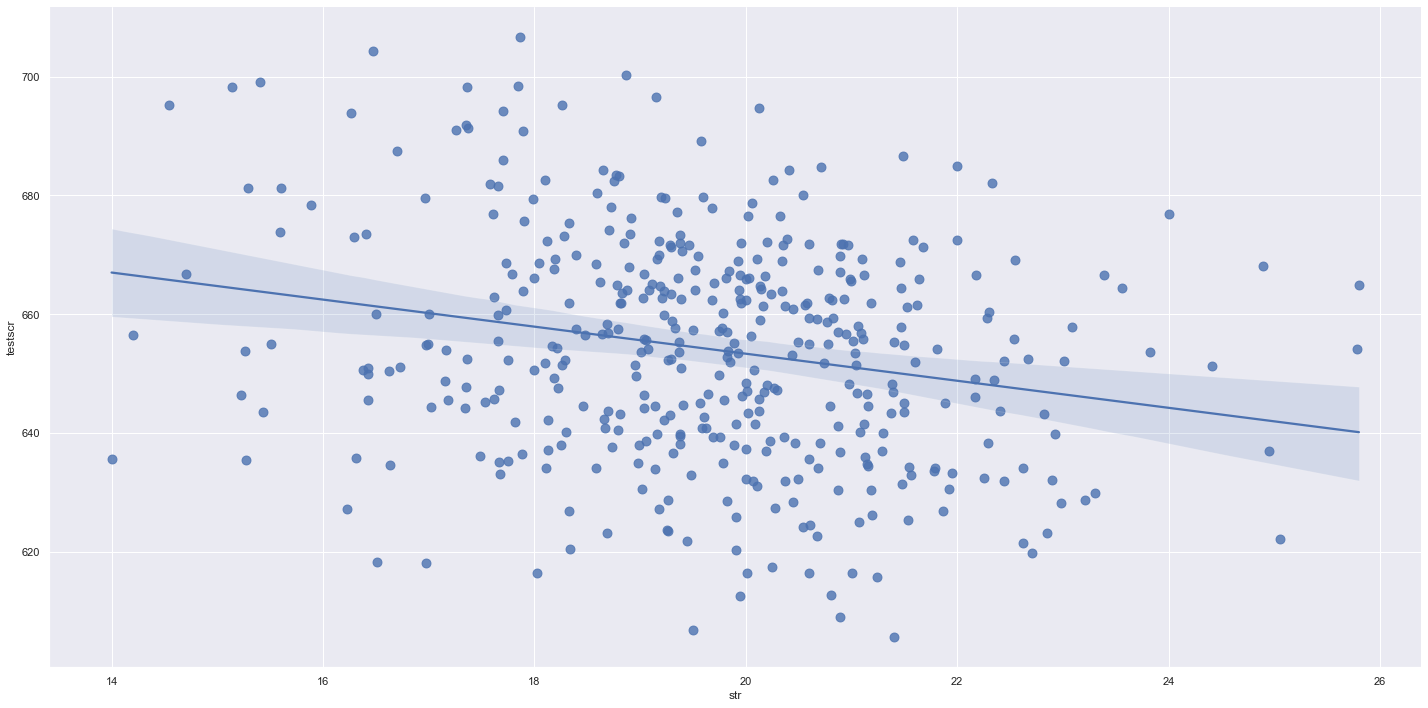

In [5]:
sns.lmplot(x="str", y="testscr", data=caschool,
           ci=99, scatter_kws={"s": 80},
          height=10, aspect=2 );

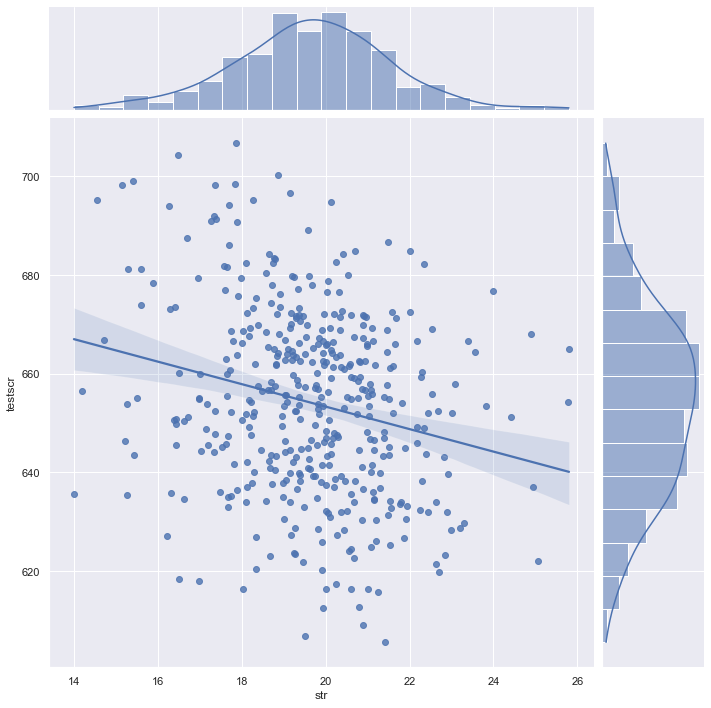

In [6]:
sns.jointplot(x="str", y="testscr", data=caschool,
           kind="reg", height=10, space=0.08);

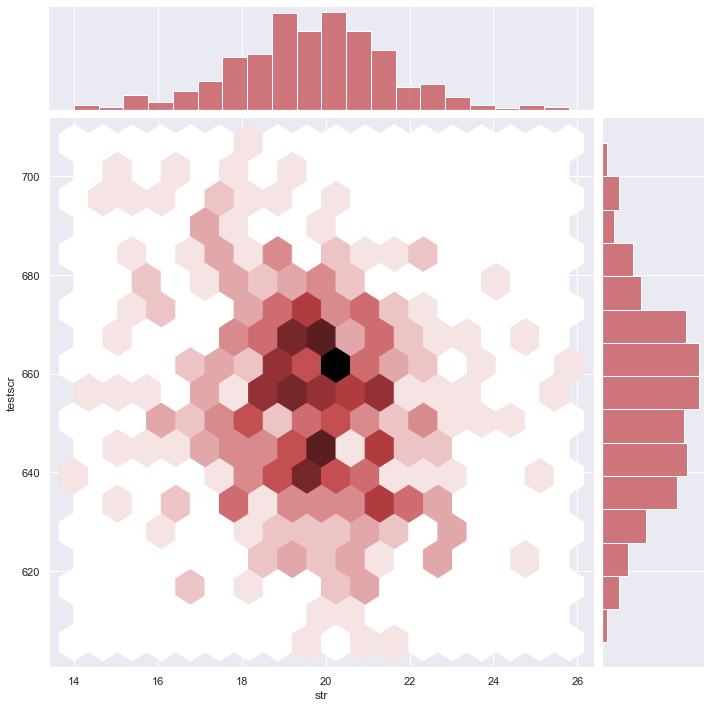

In [7]:
sns.jointplot(x="str", y="testscr", data=caschool,
           kind="hex", height=10, space=0.08, color="r");

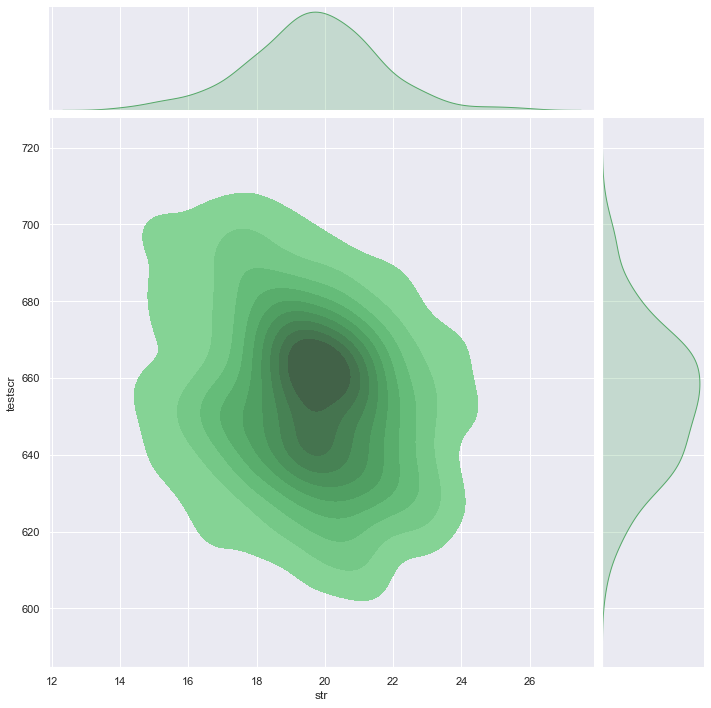

In [8]:
sns.jointplot(x="str", y="testscr", data=caschool,
           kind="kde", height=10, space=0.08, color="g", fill=True); # Try: fill=False

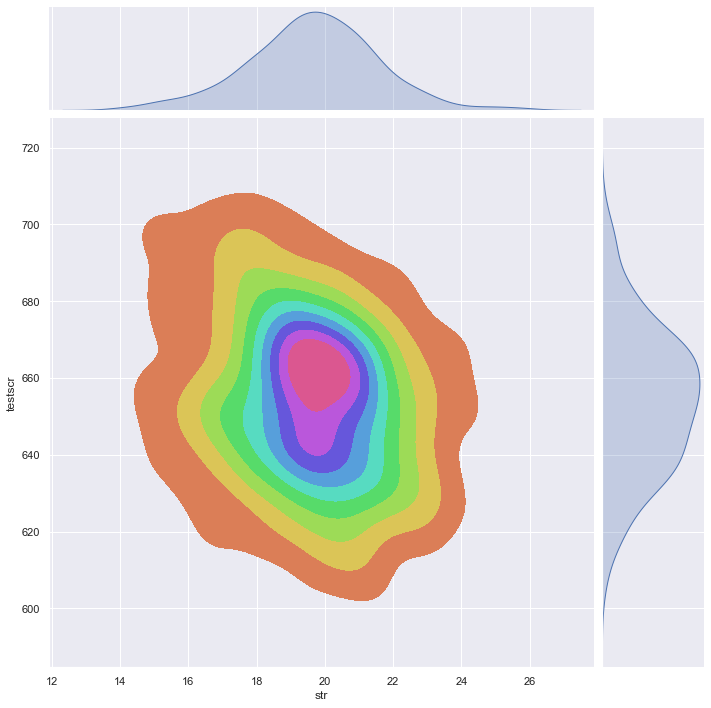

In [9]:
sns.jointplot(x="str", y="testscr", data=caschool,
              kind="kde", height=10, space=0.08,
              cmap="hls", 
              fill=True); 
# Try: cmap='viridis' and 'viridis_r'
# Try: cmap=sns.cubehelix_palette(reverse=True, as_cmap=True)
# Try: cmap=cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True, reverse=False)

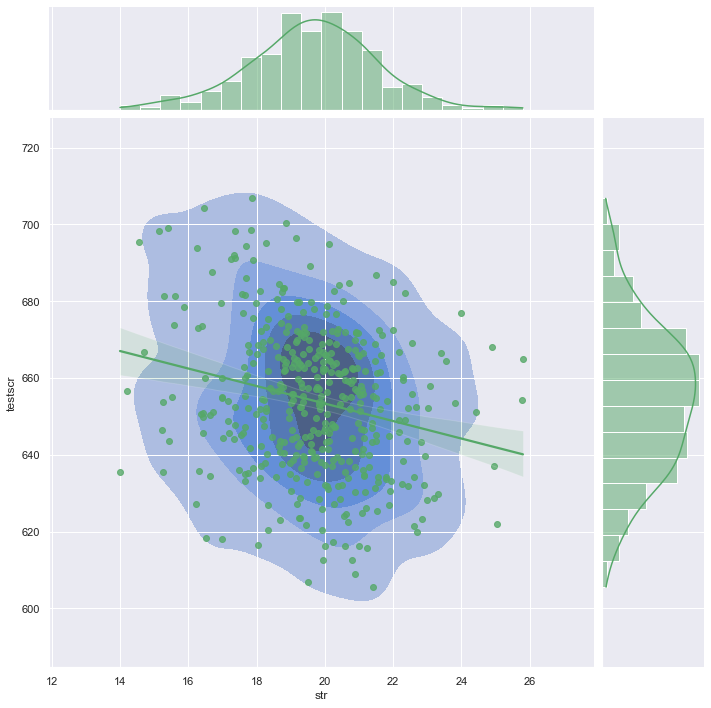

In [10]:
# Draw a scatterplot, then add a joint density estimate:
g=(sns.jointplot(x="str", y="testscr", data=caschool,
           kind="reg", height=10, space=0.08, color="g")
   .plot_joint(sns.kdeplot, zorder=0, n_levels=6, fill=True))


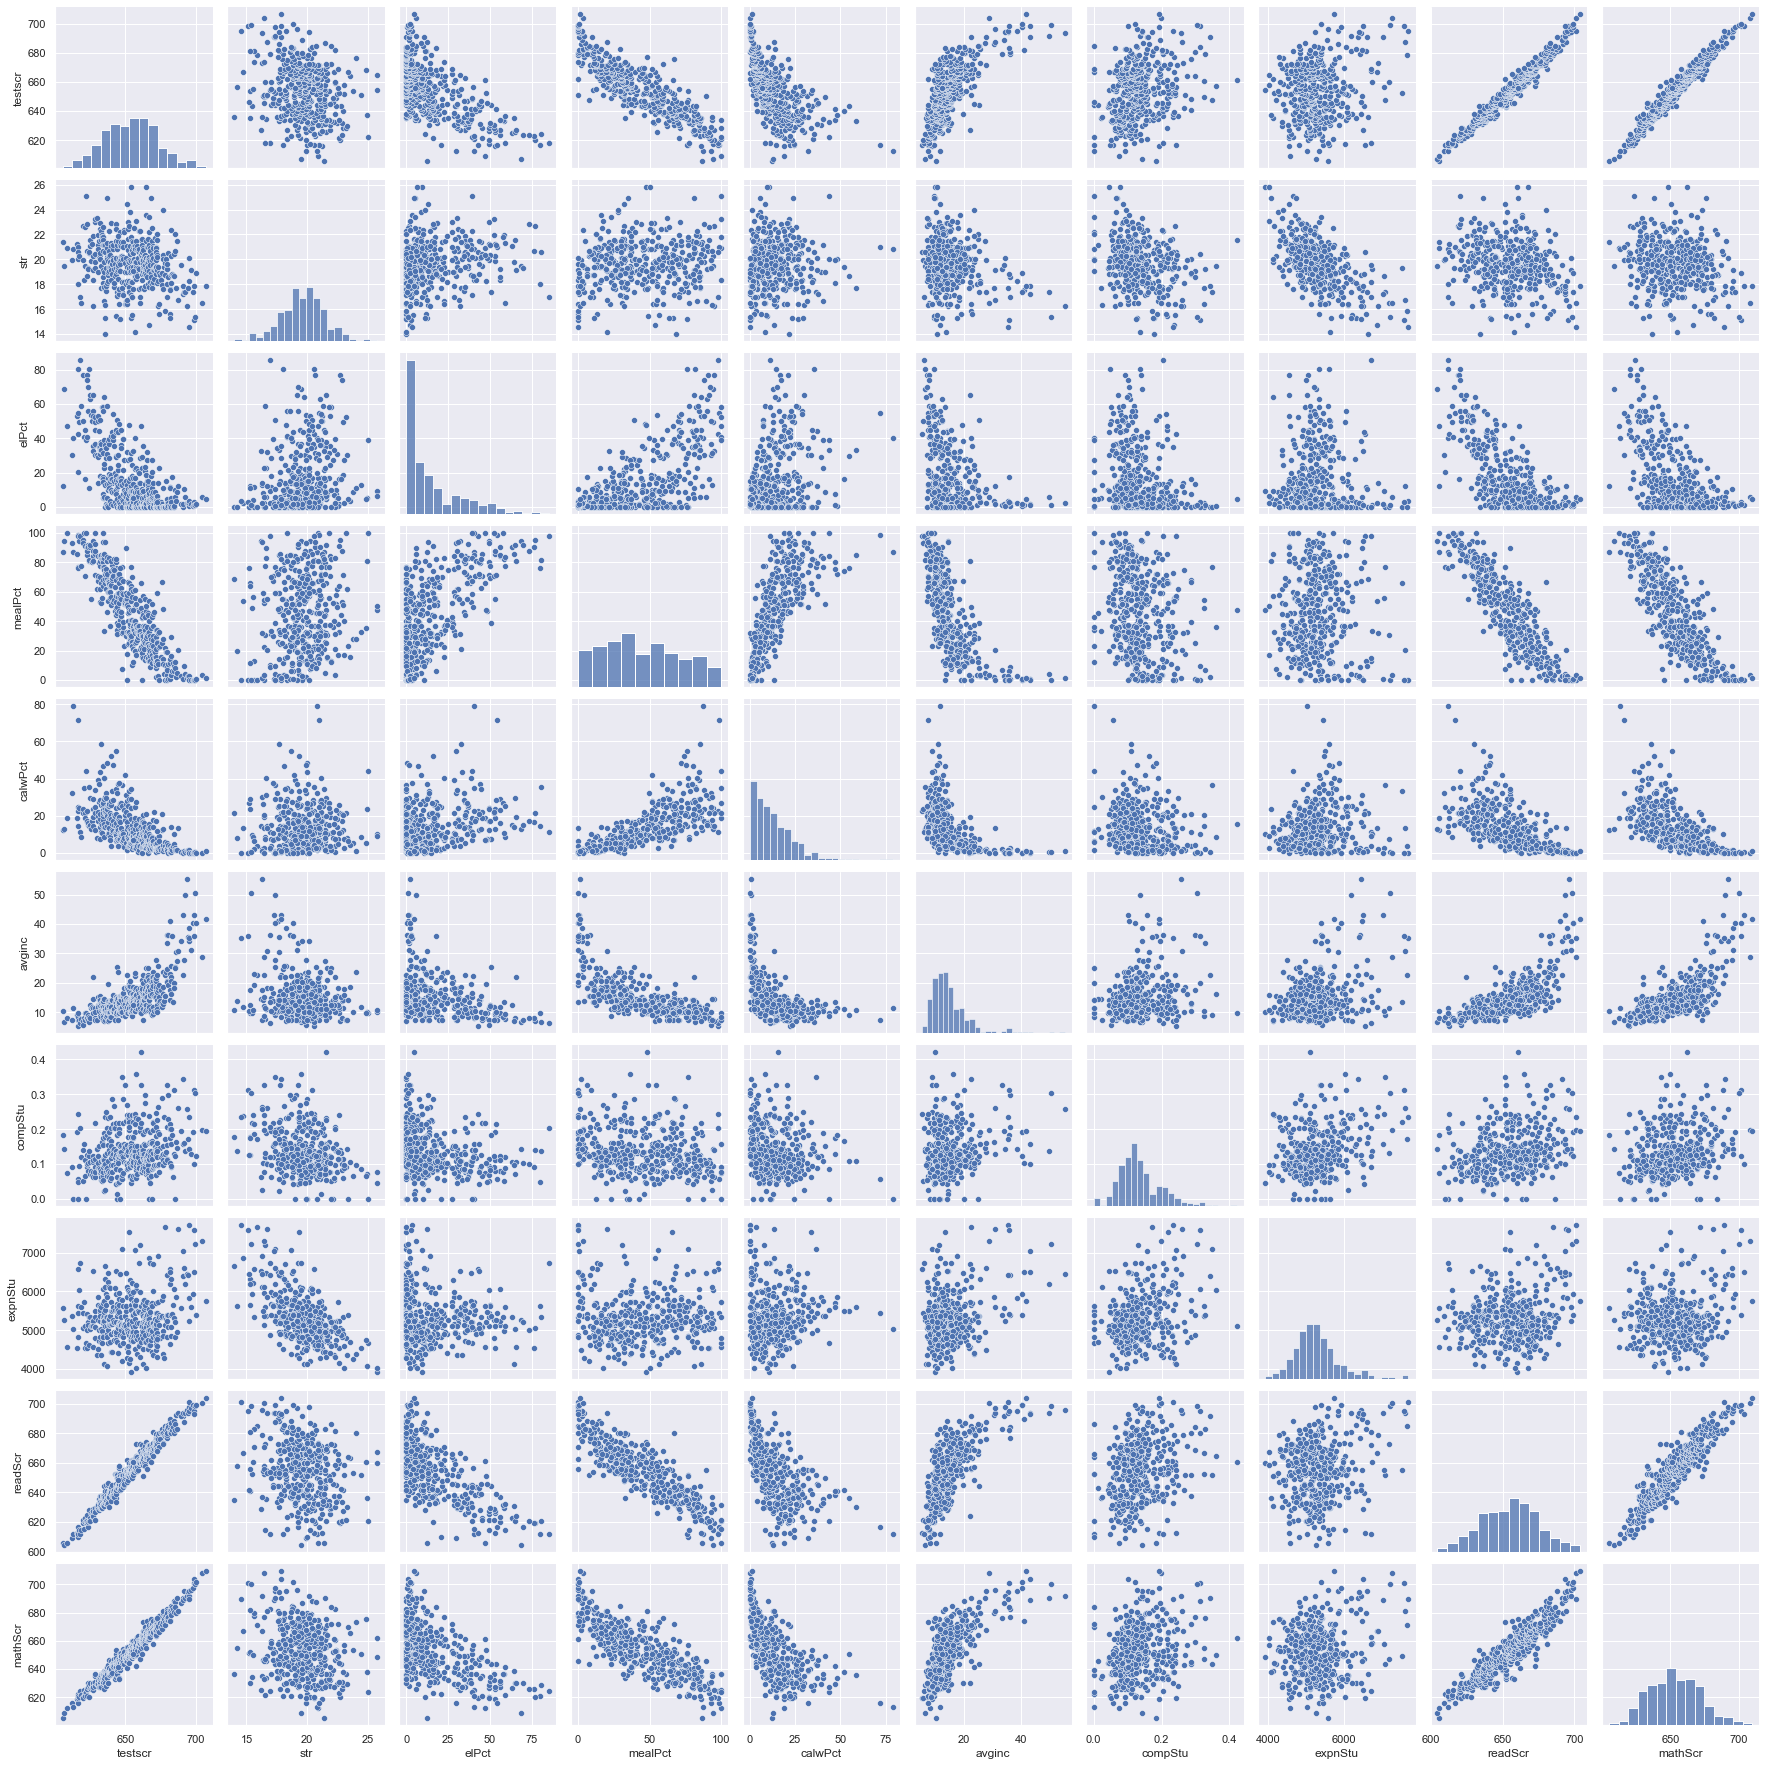

In [11]:
sns.pairplot(caschool);

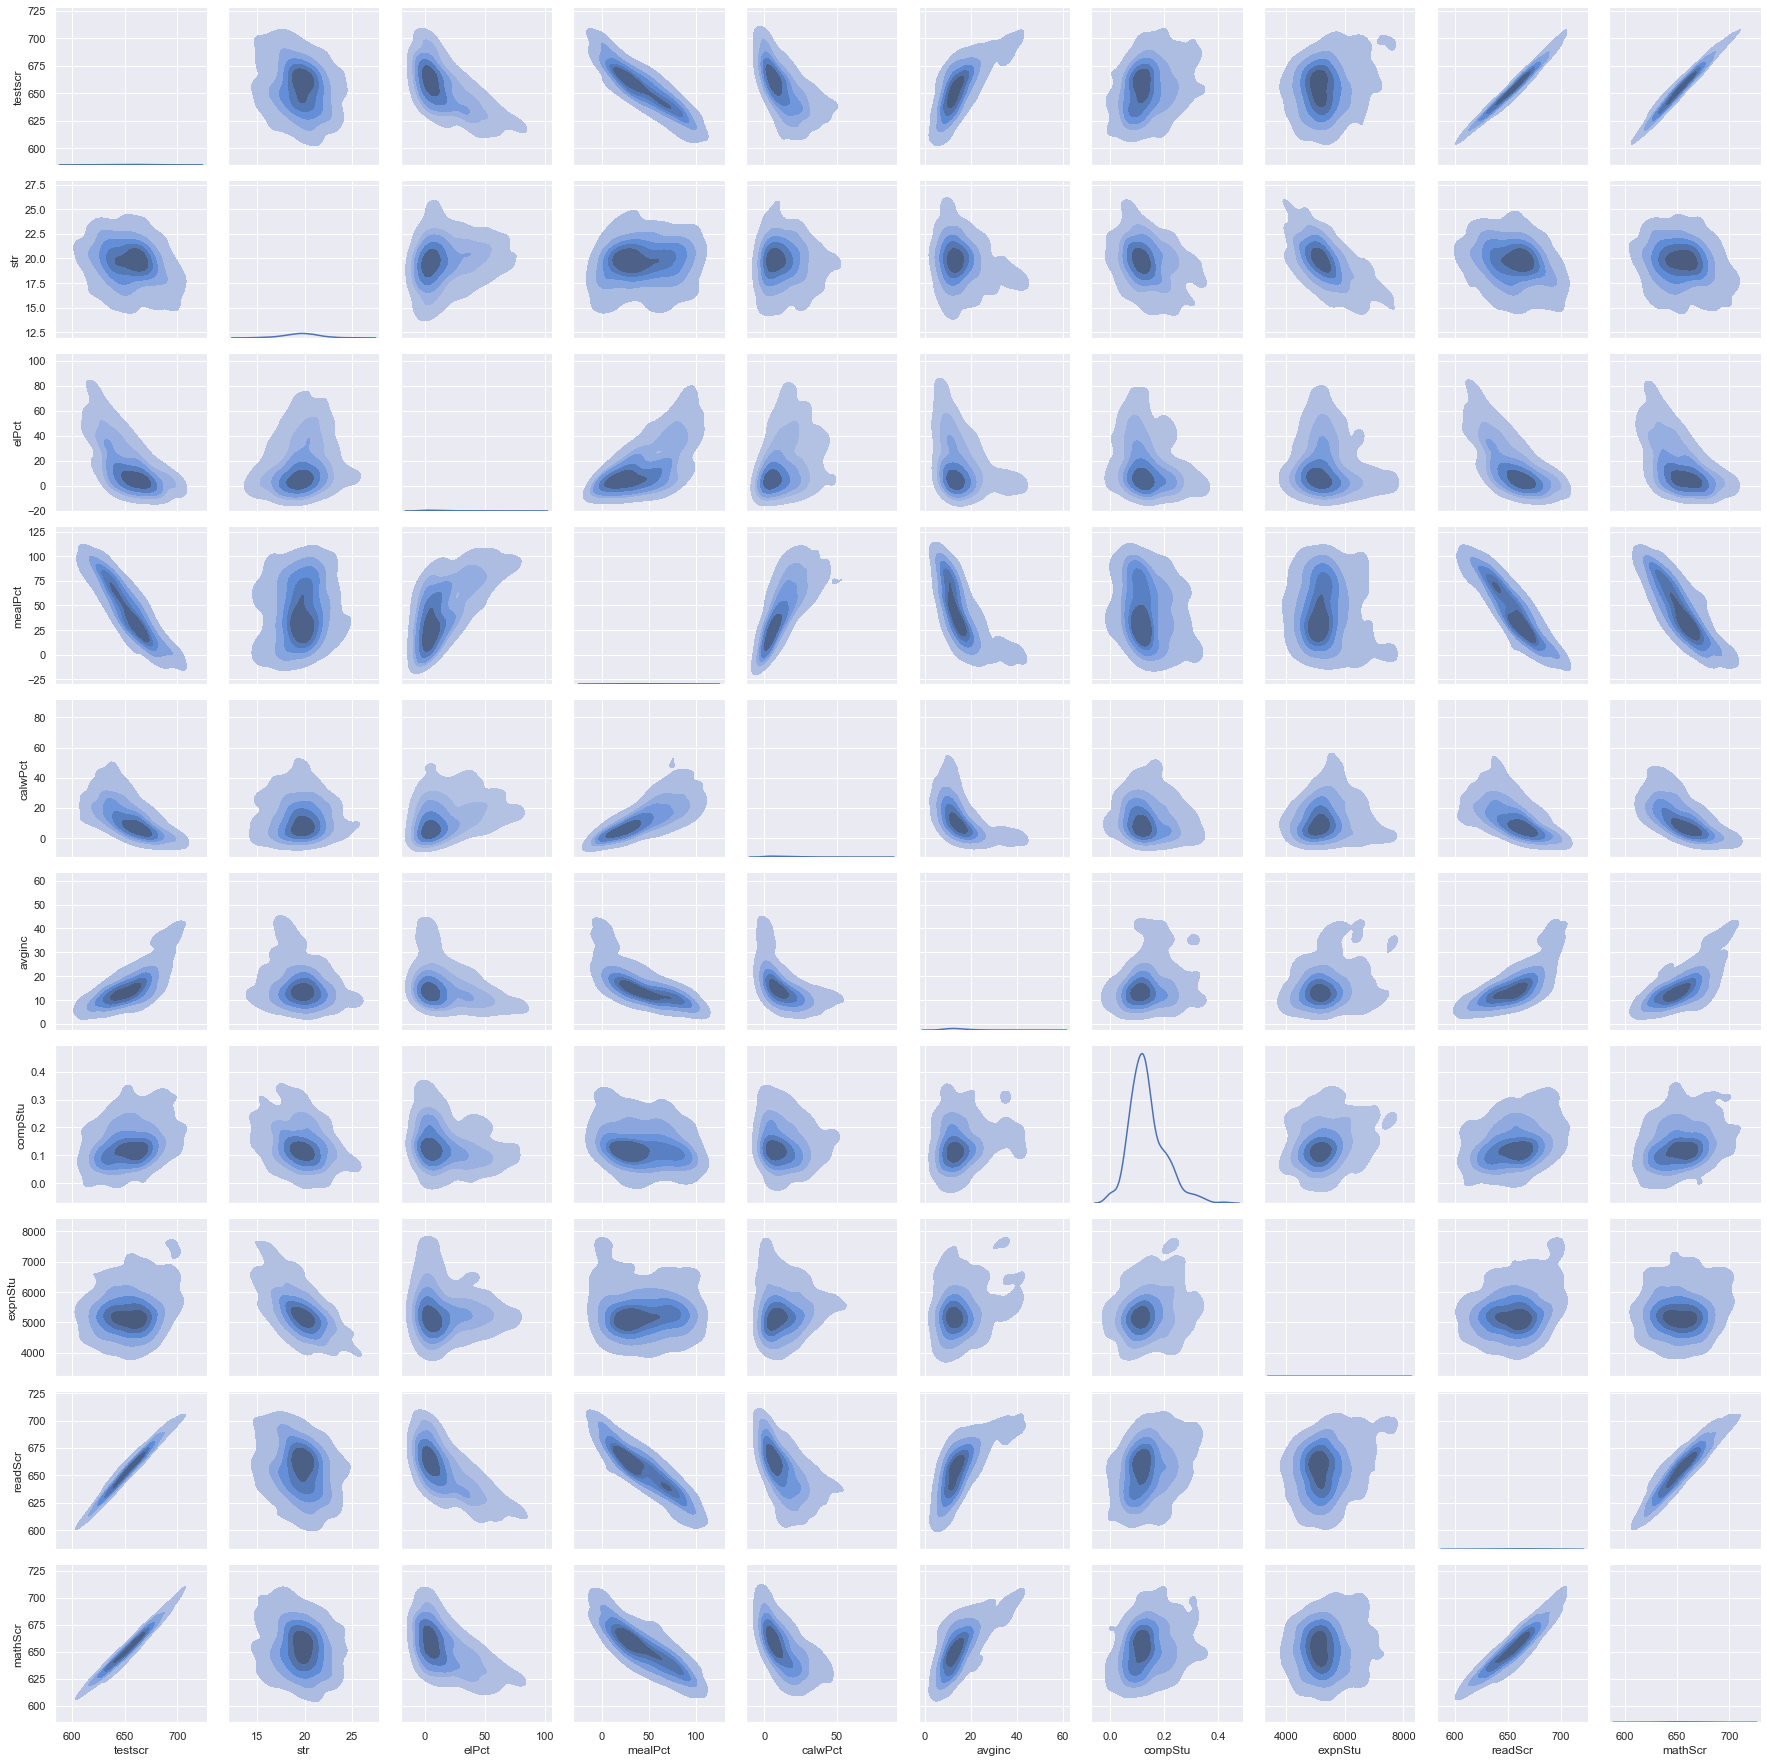

In [12]:
g = sns.PairGrid(caschool)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6, fill=True);

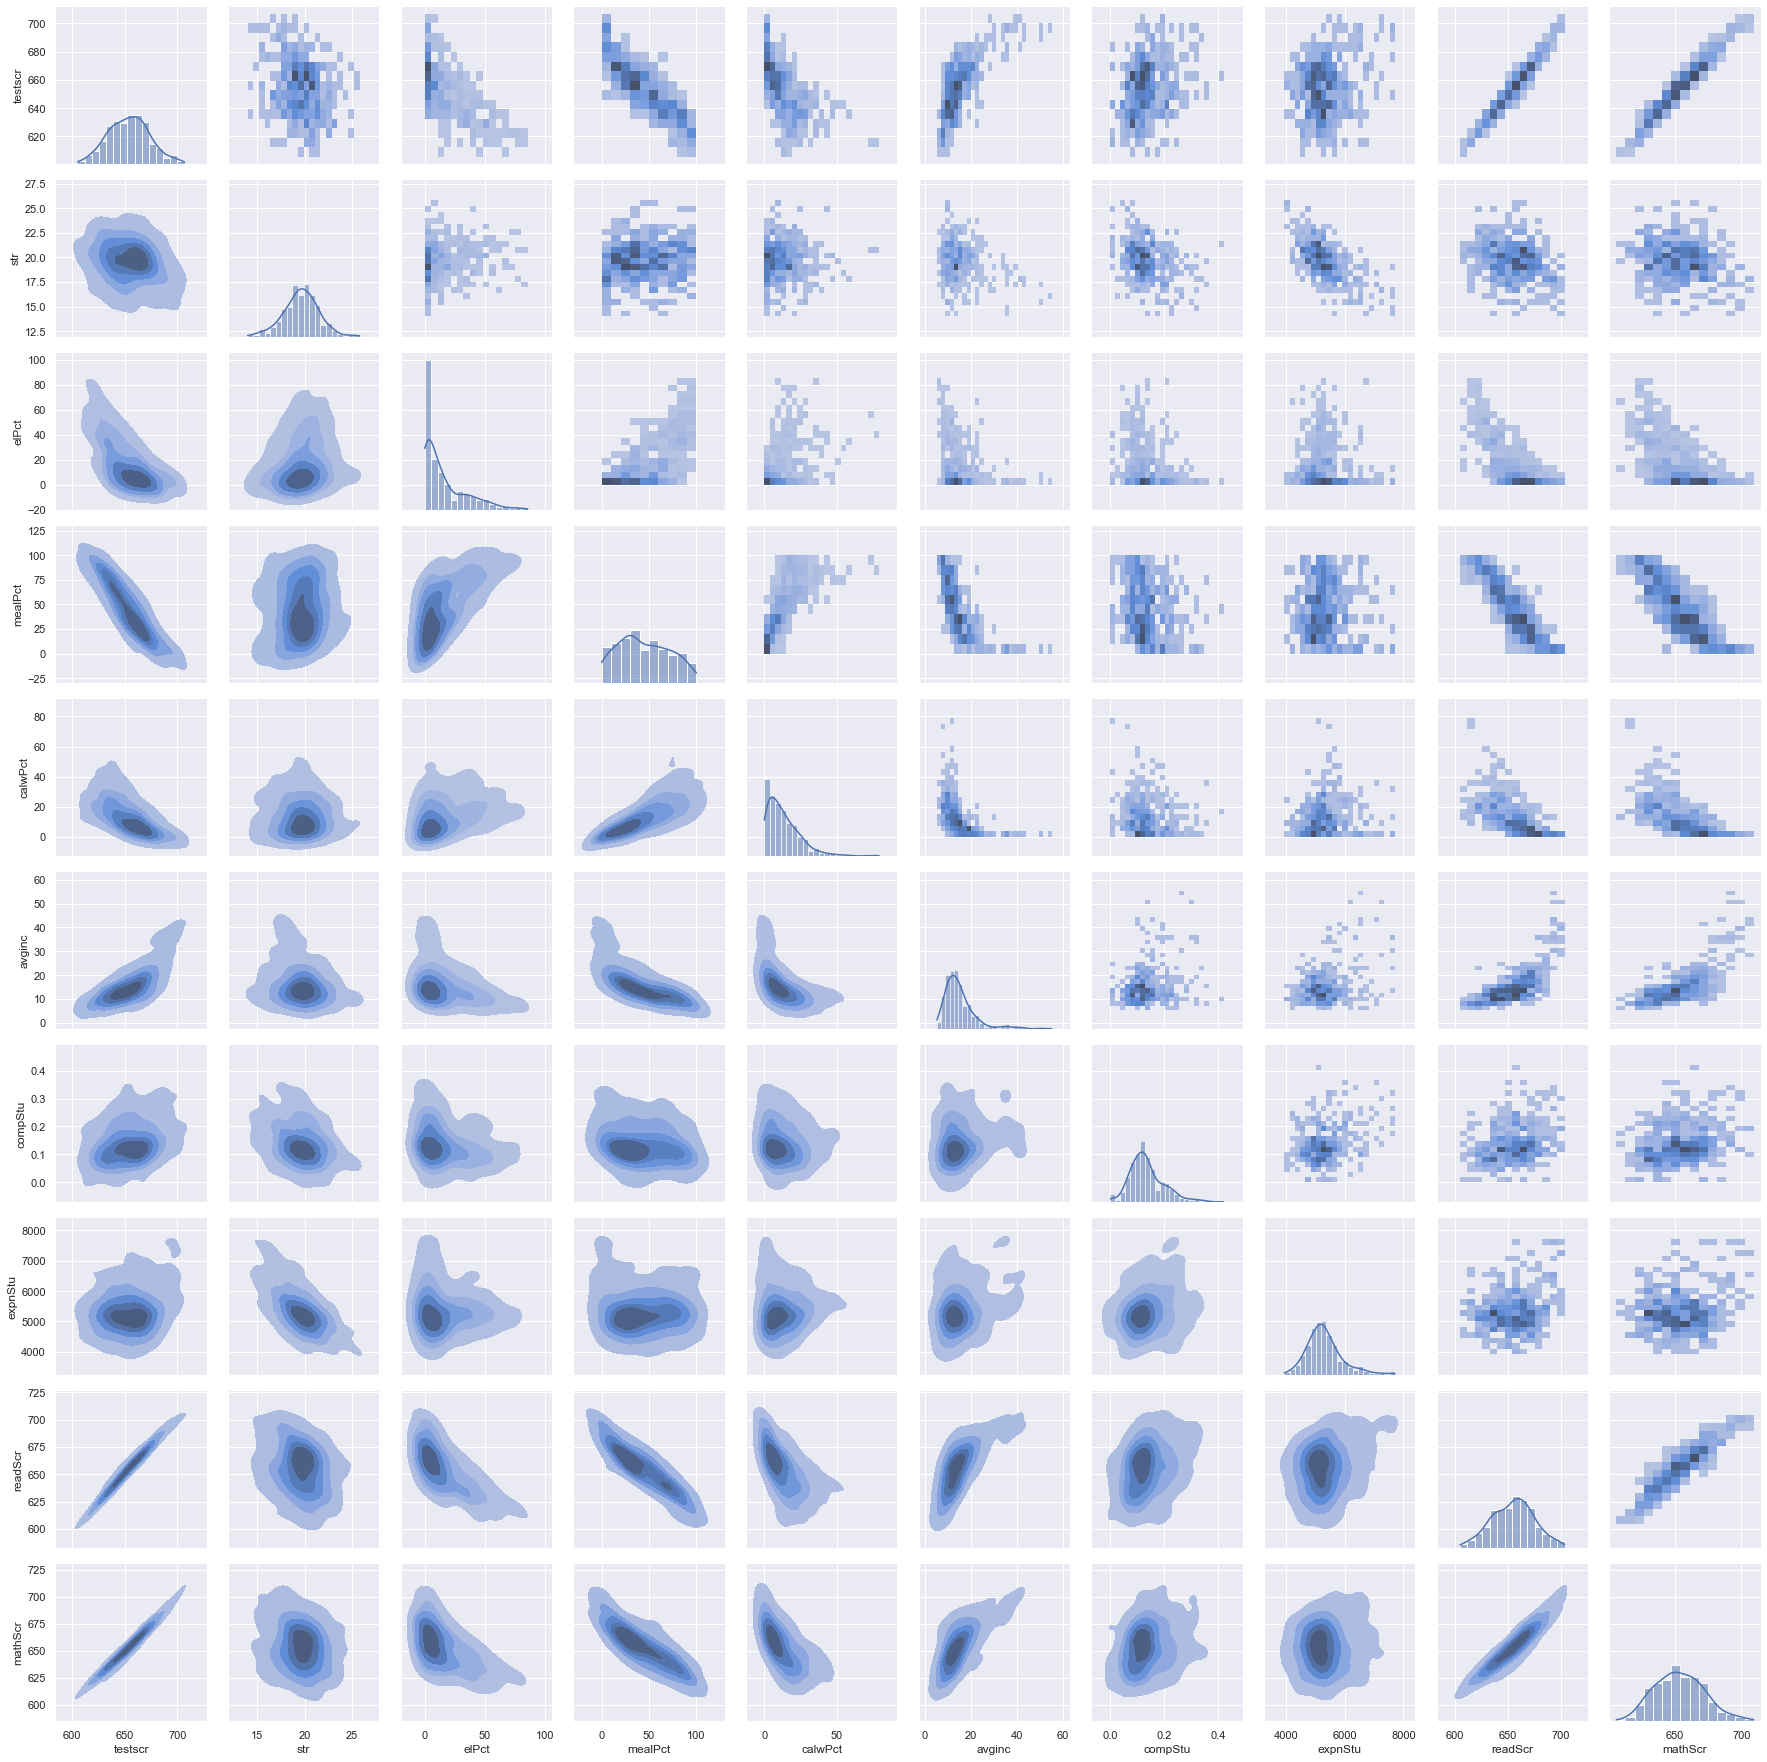

In [13]:
g = sns.PairGrid(caschool)
g.map_diag(sns.histplot, kde=True)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, n_levels=6, fill=True); # Try adding: cmap='viridis_r'

## Querying a subset of data

In [14]:
df.query("county == 'Butte'")

,ObservationNumber,distCode,county,district,gr_span,enrlTot,teachers,calwPct,mealPct,computer,testscr,compStu,expnStu,str,avginc,elPct,readScr,mathScr
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.15,15.42,47.92,101,661.20,0.42,5099.38,21.52,9.82,4.58,660.5,661.9
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.90,55.03,76.32,169,643.60,0.11,5501.95,18.70,8.98,30.00,636.3,650.9
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.00,36.48,77.05,85,647.70,0.35,7101.83,17.36,8.98,0.00,651.9,643.5
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.50,33.11,78.43,171,640.85,0.13,5235.99,18.67,9.08,13.86,641.8,639.9
93,94,61382,Butte,Bangor Union Elementary,KK-08,146,8.00,25.34,54.11,34,637.95,0.23,6231.60,18.25,7.11,0.00,646.1,629.8
107,108,61507,Butte,Oroville City Elementary,KK-08,3401,175.55,52.22,74.27,560,639.80,0.16,5489.59,19.37,11.27,16.17,641.5,638.1


In [15]:
df.query("enrlTot > 1000")

,ObservationNumber,distCode,county,district,gr_span,enrlTot,teachers,calwPct,mealPct,computer,testscr,compStu,expnStu,str,avginc,elPct,readScr,mathScr
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.90,55.03,76.32,169,643.60,0.11,5501.95,18.70,8.98,30.00,636.3,650.9
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.50,33.11,78.43,171,640.85,0.13,5235.99,18.67,9.08,13.86,641.8,639.9
9,10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.00,78.99,87.32,0,612.65,0.00,5036.21,20.81,11.61,40.28,611.9,613.4
18,19,64709,Los Angeles,Lennox Elementary,KK-08,6880,303.03,21.28,94.97,960,619.80,0.14,5064.62,22.70,7.02,77.01,619.1,620.5
19,20,63560,Kern,Lamont Elementary,KK-08,2688,135.00,23.44,93.23,139,620.30,0.05,5433.59,19.91,5.70,49.81,621.3,619.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,411,61770,Contra Costa,Orinda Union Elementary,KK-08,2422,139.47,0.00,0.12,466,698.20,0.19,5933.15,17.37,40.26,0.58,699.1,697.3
411,412,68908,San Mateo,Hillsborough City Elementary,KK-08,1318,87.06,0.15,0.00,412,698.25,0.31,7593.41,15.14,35.81,2.81,695.4,701.1
414,415,69682,Santa Clara,Saratoga Union Elementary,KK-08,2341,124.09,0.17,0.60,286,700.30,0.12,5392.64,18.87,40.40,2.05,698.9,701.7
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.48,1.07,1.50,721,706.75,0.19,5741.46,17.86,41.73,4.73,704.0,709.5


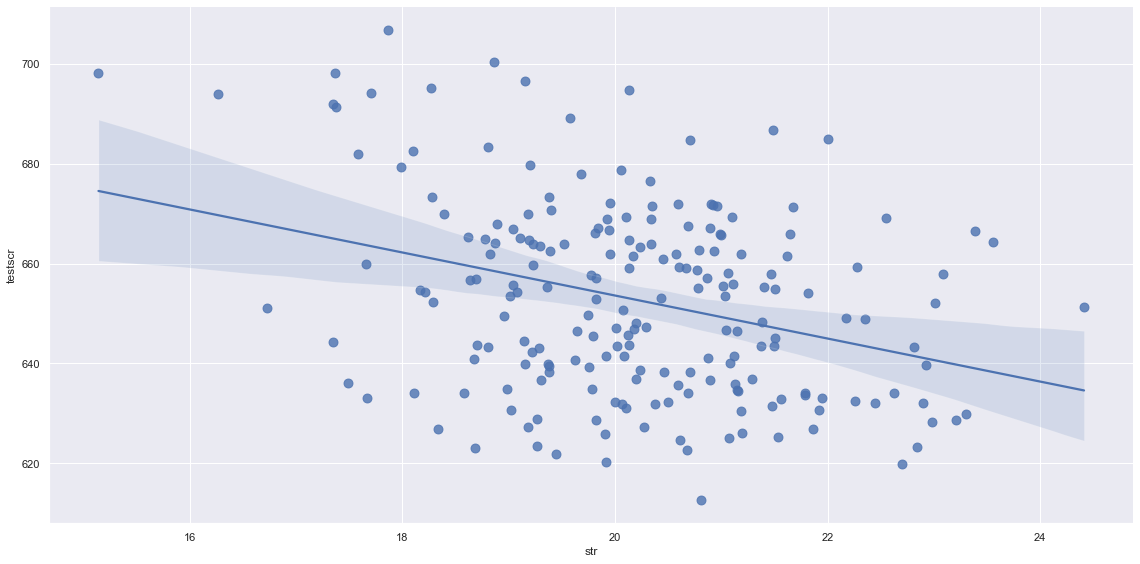

In [16]:
sns.lmplot(x="str", y="testscr", data=df.query("enrlTot > 1000"),
           ci=99, scatter_kws={"s": 80},
          height=8,aspect=2);

<AxesSubplot:xlabel='str', ylabel='testscr'>

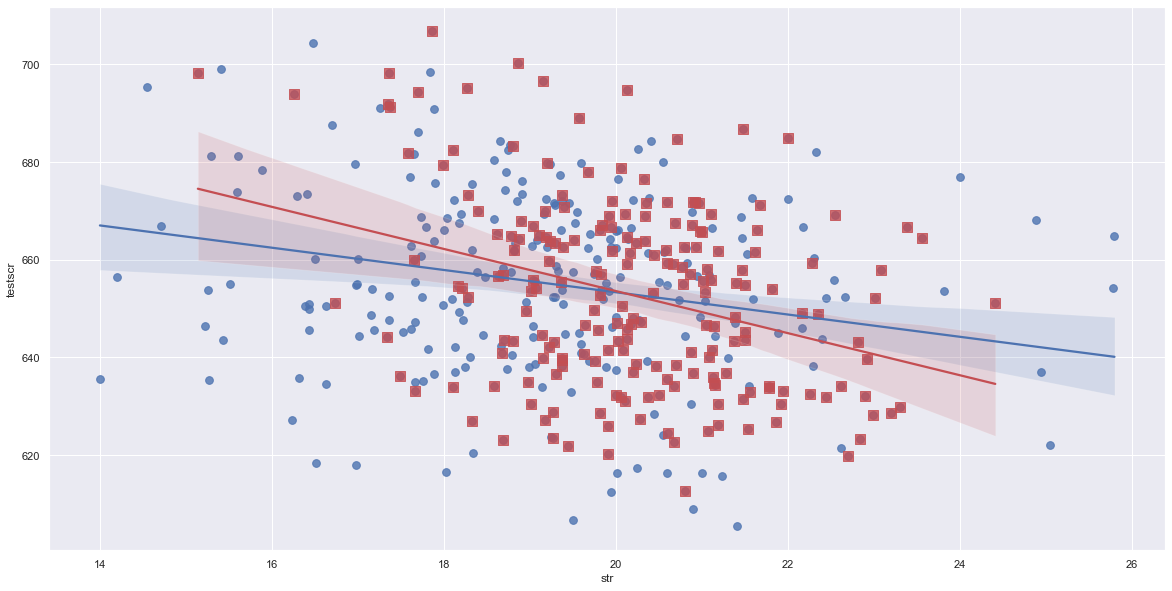

In [18]:
fig, ax = plt.subplots(figsize=(20,10))

sns.regplot(x="str", y="testscr", data=df,
           ci=99, scatter_kws={"s": 60, "color":"b"}, line_kws={"color": "b"},ax=ax)

sns.regplot(x="str", y="testscr", data=df.query("enrlTot > 1000"), marker="s",
           ci=99, scatter_kws={"s": 100, "color": "r"}, line_kws={"color": "r"}, ax=ax)

#sns.regplot(x="str", y="testscr", data=df, robust=True,
#           ci=99, scatter_kws={"s": 60, "color":"g"}, line_kws={"color": "g"},ax=ax)

## Plots for nonlinear and robust regressions

<AxesSubplot:xlabel='x', ylabel='y'>

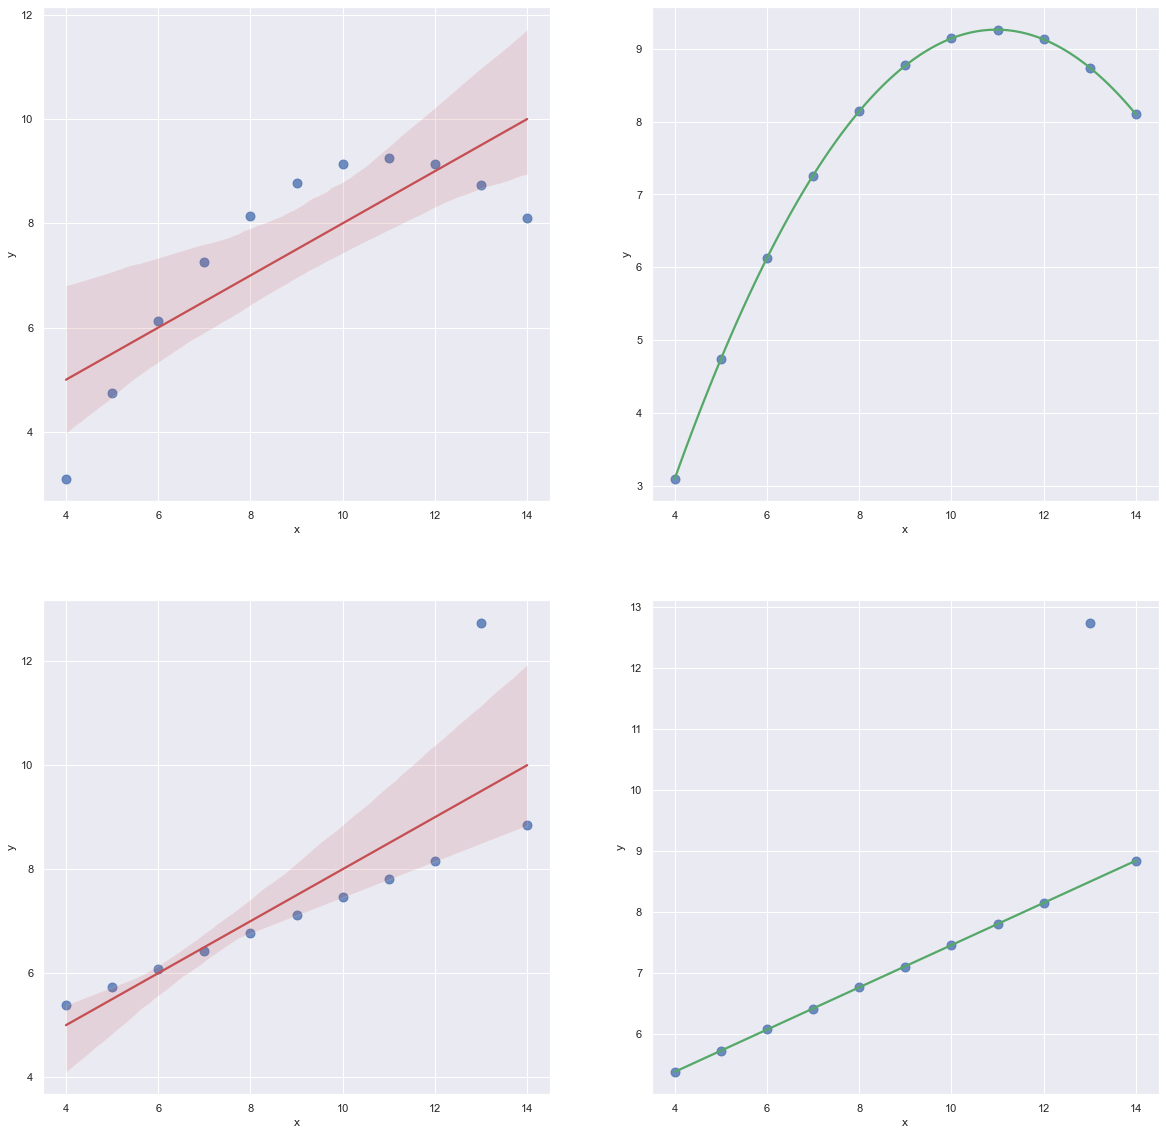

In [19]:
anscombe = sns.load_dataset("anscombe")

fig, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
# Note the differences among the subplots (order=1 or 2 and robust=True or False)

sns.regplot(x="x", y="y", data=anscombe.loc[anscombe.dataset == "II"],
                 scatter_kws={"s": 80}, line_kws={"color": "r"},
                 order=1, ci=90, ax=ax1[0,0])

sns.regplot(x="x", y="y", data=anscombe.loc[anscombe.dataset == "II"],
                 scatter_kws={"s": 80}, line_kws={"color": "g"},
                 order=2, ci=90, ax=ax1[0,1]) # polynomial regression of order 2

sns.regplot(x="x", y="y", data=anscombe.loc[anscombe.dataset == "III"],
                 scatter_kws={"s": 80}, line_kws={"color": "r"},
                 robust=False, ci=90, ax=ax1[1,0]) # robust regression

sns.regplot(x="x", y="y", data=anscombe.loc[anscombe.dataset == "III"],
                 scatter_kws={"s": 80}, line_kws={"color": "g"},
                 robust=True, ci=None, ax=ax1[1,1])

## Back to our California Highschol data


In [20]:
caschool

,testscr,str,elPct,mealPct,calwPct,avginc,compStu,expnStu,readScr,mathScr
0,690.80,17.89,0.00,2.04,0.51,22.69,0.34,6384.91,691.6,690.0
1,661.20,21.52,4.58,47.92,15.42,9.82,0.42,5099.38,660.5,661.9
2,643.60,18.70,30.00,76.32,55.03,8.98,0.11,5501.95,636.3,650.9
3,647.70,17.36,0.00,77.05,36.48,8.98,0.35,7101.83,651.9,643.5
4,640.85,18.67,13.86,78.43,33.11,9.08,0.13,5235.99,641.8,639.9
...,...,...,...,...,...,...,...,...,...,...
415,704.30,16.47,6.00,3.56,0.10,28.72,0.20,7290.34,700.9,707.7
416,706.75,17.86,4.73,1.50,1.07,41.73,0.19,5741.46,704.0,709.5
417,645.00,21.89,24.26,37.19,3.56,23.73,0.10,4402.83,648.3,641.7
418,672.20,20.20,2.97,59.41,11.88,9.95,0.14,4776.34,667.9,676.5


In [21]:
reg = smf.ols('testscr ~ str', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           2.78e-06
Time:                        21:01:23   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330      9.467     73.825      0.000     680.323     717.543
str           -2.2798      0.480     -4.751      0.000      -3.223      -1.337
==============================================================================
Omnibus:                        5.390   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.589
Skew:                          -0.012   Prob(JB):                        0.166
Kurtosis:                       2.548   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
reg = smf.ols('testscr ~ str + elPct', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     155.0
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           4.62e-51
Time:                        21:01:27   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.0322      7.411     92.566      0.000     671.464     700.600
str           -1.1013      0.380     -2.896      0.004      -1.849      -0.354
elPct         -0.6498      0.039    -16.516      0.000      -0.727      -0.572
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.550
Skew:                           0.088   Prob(JB):                        0.760
Kurtosis:                       3.024   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> <font color=DeepPink>Exercise</font>: <br>
> <font color=red>Is there an omitted variable bias?</font>

In [23]:
reg = smf.ols('testscr ~ str + elPct + mealPct', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     476.3
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          4.03e-134
Time:                        21:02:14   Log-Likelihood:                -1520.5
No. Observations:                 420   AIC:                             3049.
Df Residuals:                     416   BIC:                             3065.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.1500      4.686    149.423      0.000     690.939     709.361
str           -0.9983      0.239     -4.181      0.000      -1.468      -0.529
elPct         -0.1216      0.032     -3.762      0.000      -0.185      -0.058
mealPct       -0.5473      0.022    -25.341      0.000      -0.590      -0.505
==============================================================================
Omnibus:                        6.998   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.030   Jarque-Bera (JB):               10.626
Skew:                          -0.024   Prob(JB):                      0.00493
Kurtosis:                       3.778   Cond. No.                         621.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
reg = smf.ols('testscr ~ str + elPct + mealPct + calwPct', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     357.1
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          7.03e-133
Time:                        21:02:19   Log-Likelihood:                -1520.2
No. Observations:                 420   AIC:                             3050.
Df Residuals:                     415   BIC:                             3071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.3918      4.698    149.084      0.000     691.157     709.627
str           -1.0144      0.240     -4.231      0.000      -1.486      -0.543
elPct         -0.1298      0.034     -3.819      0.000      -0.197      -0.063
mealPct       -0.5286      0.032    -16.422      0.000      -0.592      -0.465
calwPct       -0.0479      0.061     -0.785      0.433      -0.168       0.072
==============================================================================
Omnibus:                        6.583   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                9.701
Skew:                          -0.032   Prob(JB):                      0.00782
Kurtosis:                       3.742   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

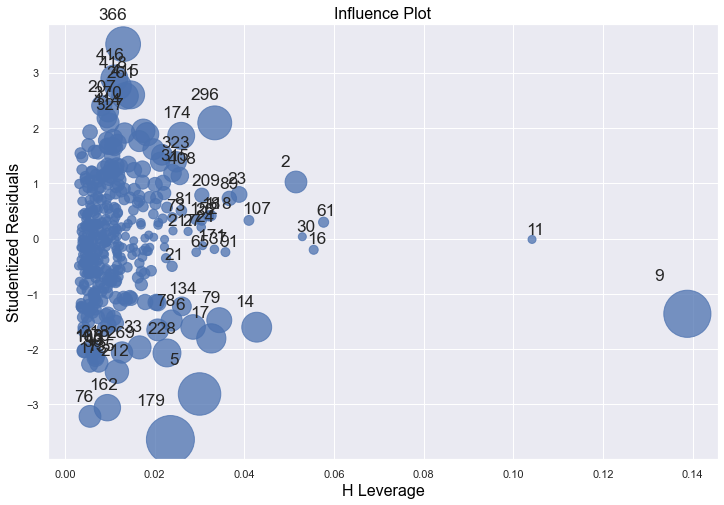

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(reg, ax=ax, criterion="cooks") # criterion = {"DFFITS" or "cooks"}, additional parameter to try "plot_alpha=0.7"

### Partial Regression Plots

Since we are doing multivariate regressions, we cannot just look at individual bivariate plots to discern relationships. Instead, we want to look at the relationship of the dependent variable and independent variables conditional on the other independent variables. We can do this through using **partial regression plots**, otherwise known as added variable plots.

In a partial regression plot, to discern **<font color=OrangeRed>the relationship between the response variable and the $k$-th variable</font>**, we:

1. compute the residuals by regressing the response variable versus the independent variables excluding $X_k$. We can denote this by $X_{\sim k}$. We then 
2. compute the residuals by regressing $X_k$ on $X_{\sim k}$. 
3. The partial regression plot is the plot of the former versus the latter residuals.

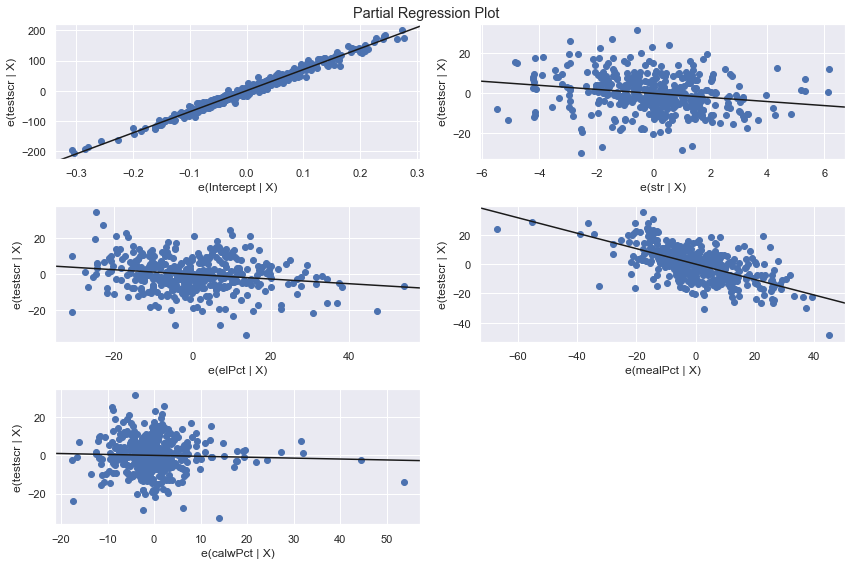

In [30]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg, fig=fig)

### Fit Plot

The `plot_fit` function plots the fitted values versus a chosen independent variable. It includes prediction confidence intervals and optionally plots the true dependent variable.

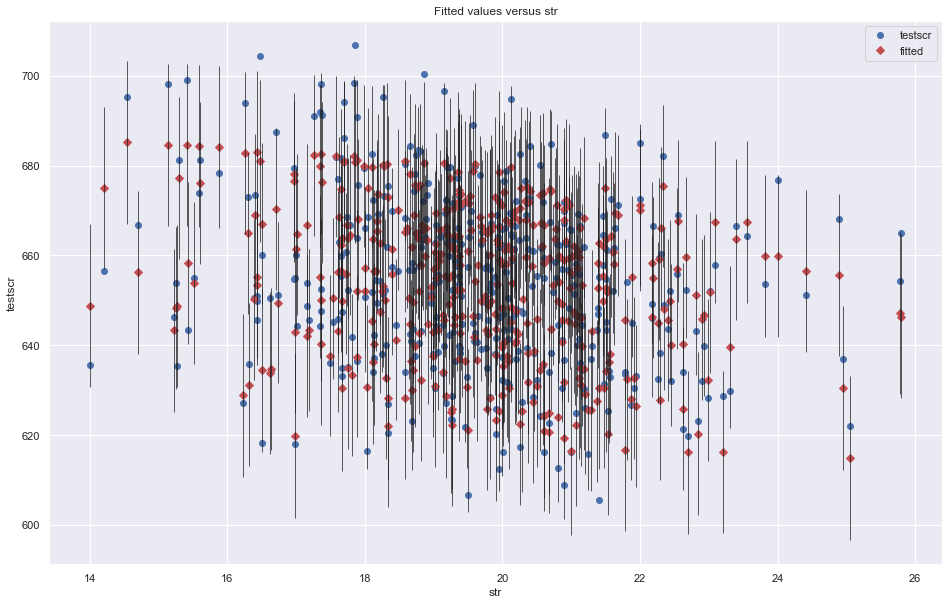

In [30]:
fig, ax = plt.subplots(figsize=(16, 10))
fig = sm.graphics.plot_fit(reg, "str", ax=ax)

In [31]:
reg = smf.ols('testscr ~ str + elPct + mealPct + calwPct + readScr + mathScr', data=df).fit()
reg.summary() # Compare summary "Notes" and R^2 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.253e+13
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:11:15   Log-Likelihood:                 3912.5
No. Observations:                 420   AIC:                            -7811.
Df Residuals:                     413   BIC:                            -7783.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.258e-06   8.73e-05      0.037      0.970      -0.000       0.000
str        -2.155e-07   5.98e-07     -0.360      0.719   -1.39e-06    9.61e-07
elPct       1.876e-07    8.8e-08      2.132      0.034    1.46e-08    3.61e-07
mealPct    -9.167e-08   1.03e-07     -0.893      0.373   -2.94e-07     1.1e-07
calwPct    -6.905e-08   1.48e-07     -0.466      0.641    -3.6e-07    2.22e-07
readScr        0.5000   1.85e-07   2.71e+06      0.000       0.500       0.500
mathScr        0.5000   1.55e-07   3.22e+06      0.000       0.500       0.500
==============================================================================
Omnibus:                      101.449   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.125
Skew:                          -0.041   Prob(JB):                     7.03e-05
Kurtosis:                       1.958   Cond. No.                     7.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

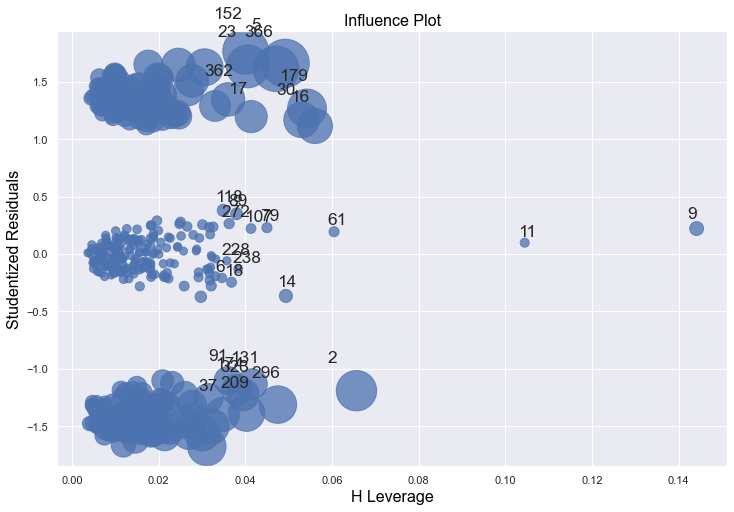

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(reg, ax=ax, criterion="cooks")

> **<font color=DeepPink>Exercise</font>**: <br>
> <font color=red>Is there collinearity problem?</font> <br>
> <font color=red>What went wrong with our regression model?</font>

In [32]:
import utsbootcamp as bc
bc.VIF(df,'testscr ~ str + elPct + mealPct + calwPct + readScr + mathScr')

,VIF Factor,Variable
0,6629.13,Intercept
1,1.11,str
2,2.25,elPct
3,6.73,mealPct
4,2.50,calwPct
5,11.98,readScr
6,7.34,mathScr


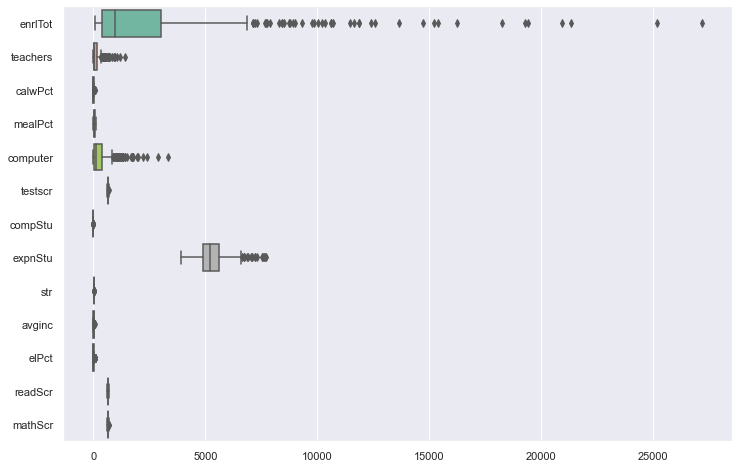

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(data=df.iloc[:,2:], orient="h", palette="Set2")

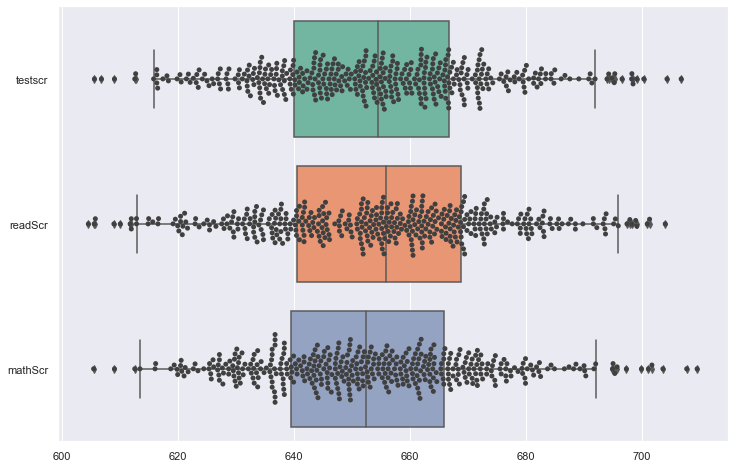

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(data=df[['testscr','readScr','mathScr']], orient="h", palette="Set2",whis=1) # Change whis=1
ax = sns.swarmplot(data=df[['testscr','readScr','mathScr']], orient="h", color=".25")

> ### <font color=red>Homework</font>:
> By default, the whisker length is set at `whis=1.5` in a `seaborn` package (recall boxplot discussion in Lecture 1). Assuming normal distribution, what value of `whis` parameter will include 80%, 90%, 95%, 99% of all data points?

## Robust regression


In [35]:
reg = smf.ols('testscr ~ str + elPct + mealPct + calwPct', data=df).fit()
#reg = smf.ols('testscr ~ str + elPct + mealPct + calwPct', data=df).fit(cov_type='HC3')
reg.summary()

# If you can identify data groupings and believe that the errors are clustered among these groups, 
# use clustered error adjusment in covariance matrix estimates:
#reg = smf.ols('testscr ~ str + elPct + mealPct + calwPct', data=df).fit(cov_type='cluster', cov_kwds={'groups': mygroups})


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     357.1
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          7.03e-133
Time:                        21:16:49   Log-Likelihood:                -1520.2
No. Observations:                 420   AIC:                             3050.
Df Residuals:                     415   BIC:                             3071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.3918      4.698    149.084      0.000     691.157     709.627
str           -1.0144      0.240     -4.231      0.000      -1.486      -0.543
elPct         -0.1298      0.034     -3.819      0.000      -0.197      -0.063
mealPct       -0.5286      0.032    -16.422      0.000      -0.592      -0.465
calwPct       -0.0479      0.061     -0.785      0.433      -0.168       0.072
==============================================================================
Omnibus:                        6.583   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                9.701
Skew:                          -0.032   Prob(JB):                      0.00782
Kurtosis:                       3.742   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When perfroming robust regression, a different function is used, which only accepts $y$ data column (endogenous variable) and data matrix $X$ (exogenous variables). Function `dmatrices` from `patsy` library allows to easily construct these subsets according to the usual regression formula notation. See below:

In [36]:
f = 'testscr ~ str + elPct + mealPct + calwPct'
y, X = dmatrices(f, df, return_type='dataframe')  # Note, that X will already contain a column on 1's - your intercept
X

,Intercept,str,elPct,mealPct,calwPct
0,1.0,17.89,0.00,2.04,0.51
1,1.0,21.52,4.58,47.92,15.42
2,1.0,18.70,30.00,76.32,55.03
3,1.0,17.36,0.00,77.05,36.48
4,1.0,18.67,13.86,78.43,33.11
...,...,...,...,...,...
415,1.0,16.47,6.00,3.56,0.10
416,1.0,17.86,4.73,1.50,1.07
417,1.0,21.89,24.26,37.19,3.56
418,1.0,20.20,2.97,59.41,11.88


In [37]:
reg_robust=sm.RLM(y,X).fit()
reg_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                testscr   No. Observations:                  420
Model:                            RLM   Df Residuals:                      415
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 24 Feb 2022                                         
Time:                        21:17:17                                         
No. Iterations:                    18                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    705.5401      4.515    156.258      0.000     696.690     714.390
str           -1.2651      0.230     -5.490      0.000      -1.717      -0.813
elPct         -0.1101      0.033     -3.370      0.001      -0.174      -0.046
mealPct       -0.5476      0.031    -17.700      0.000      -0.608      -0.487
calwPct       -0.0216      0.059     -0.369      0.712      -0.136       0.093
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [38]:
f = 'testscr ~ str + elPct + mealPct' # exclude 'calwPct' variable
y, X = dmatrices(f, df, return_type='dataframe')
reg_robust=sm.RLM(y,X).fit()
reg_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                testscr   No. Observations:                  420
Model:                            RLM   Df Residuals:                      416
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 24 Feb 2022                                         
Time:                        21:17:37                                         
No. Iterations:                    15                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    705.3070      4.504    156.604      0.000     696.480     714.134
str           -1.2507      0.229     -5.450      0.000      -1.701      -0.801
elPct         -0.1061      0.031     -3.415      0.001      -0.167      -0.045
mealPct       -0.5565      0.021    -26.807      0.000      -0.597      -0.516
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## Comparing OLS and RLM

In [40]:
# Define regression formula
var_name='str'
f = 'testscr ~ '+var_name


# OLS
reg = smf.ols(f, data=df).fit()

# RLM
y, X = dmatrices(f, df, return_type='dataframe')
reg_robust=sm.RLM(y,X).fit()

In [52]:
y

,testscr
0,690.80
1,661.20
2,643.60
3,647.70
4,640.85
...,...
415,704.30
416,706.75
417,645.00
418,672.20


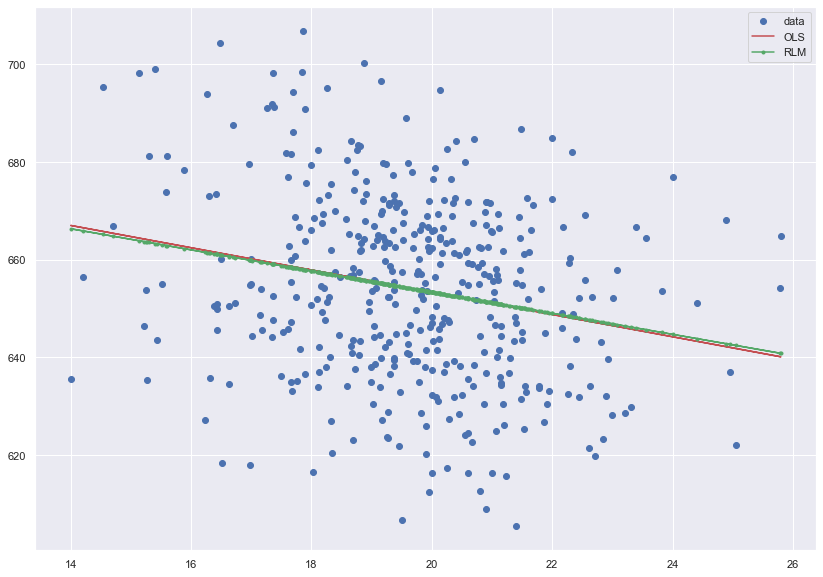

In [60]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
ax.plot(X[var_name], y.values, 'bo',label="data") # add "alpha=0.5" if too crowded

ax.plot(X[var_name], reg.fittedvalues, 'r-', label="OLS")
ax.plot(X[var_name], reg_robust.fittedvalues, 'g.-', label="RLM")
ax.legend(loc="best")

## Further Readings
- https://www.statsmodels.org/stable/examples/index.html
- https://www.statsmodels.org/stable/rlm.html - Robust linear models
